<h1 align="right" style="color:Black"> Кластеризация клиентов фитнес-центра</h1>

## Задача
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.


Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.


Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.


Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.


Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.


А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
* выделить целевые группы клиентов;
* предложить меры по снижению оттока;
* определить другие особенности взаимодействия с клиентами.

## Подключение библиотек

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


pd.options.mode.chained_assignment = None  # default='warn'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>")) #делаем блокнот широкоформатным

## Шаг 1. Загрузка данных

Поместим данные из .csv-файла в переменную типа *DataFrame*

In [54]:
gym_churn = pd.read_csv("C:\DA\projects_new\data\gym_churn.csv")
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Посмотрим на общую информацию о данных в таблице

In [55]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Все данные имеют корректные типы, все столбцы одинакового размера, пропусков нет

In [56]:
gym_churn.duplicated().sum()

0

Дублирующихся значений тоже нет. Переведем названия столбцов в нижний регистр

In [57]:
gym_churn.columns = gym_churn.columns.str.lower()
gym_churn.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

**Вывод:** данные загружены, пропусков и дубликатов нет, имена названий столбцов переведены в нижний регистр

## Шаг 2. Исследовательский анализ данных (EDA)

Изучим данные более детально:

In [58]:
gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Средние значения по бинарным переменным (gender, partner и т.д.) - это доля пользователей по соответствующим признакам (51% мужского пола, 48,7% клиентов - сотрудники компаний-партнёров и т.д.). Для количественных переменных средние значения - это абсолютные значения по данному признаку (пример: age - средний возраст 29 лет).

Стандартные отклонения у всех параметров сильно отличаются друг от друга (от 0.295 до 96.4). Это говорит нам о том, что признаки перед обучением надо стандартизировать.

Теперь сгруппируем данные по факту оттока в текущем месяце и попробуем найти закономерности:

In [59]:
clients_by_churn = gym_churn.groupby('churn').mean().reset_index(drop=True)
clients_by_churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


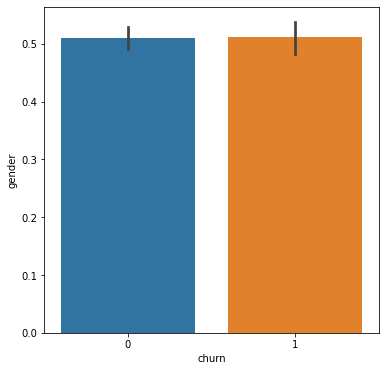

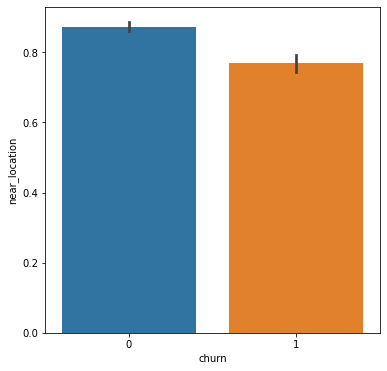

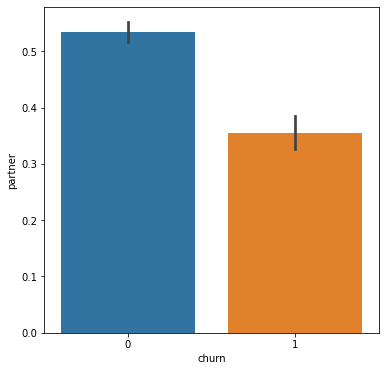

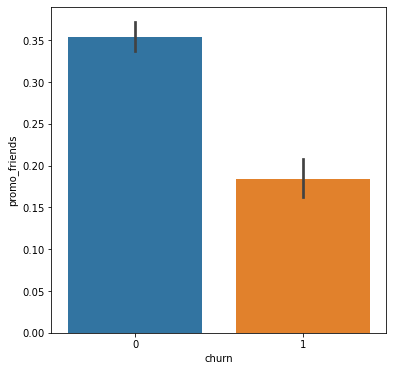

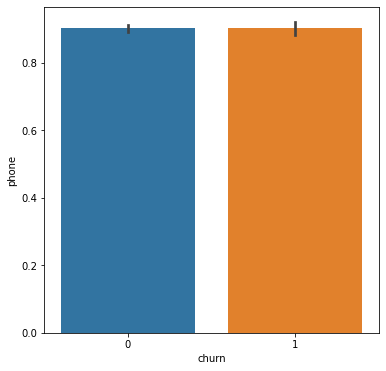

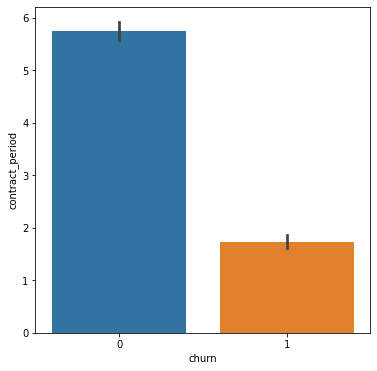

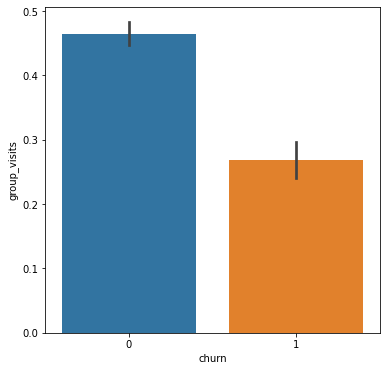

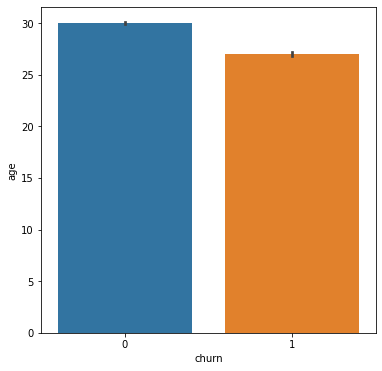

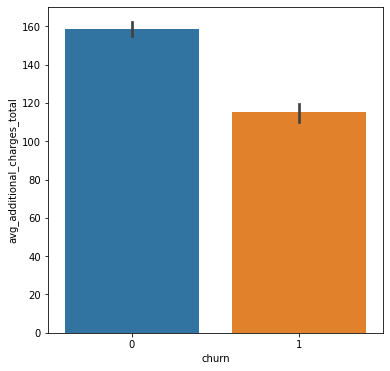

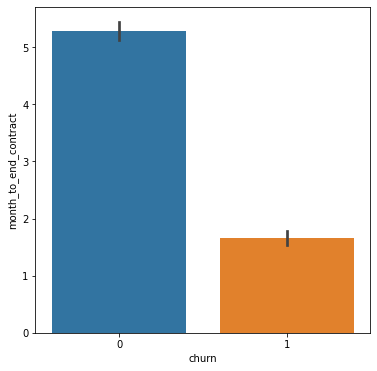

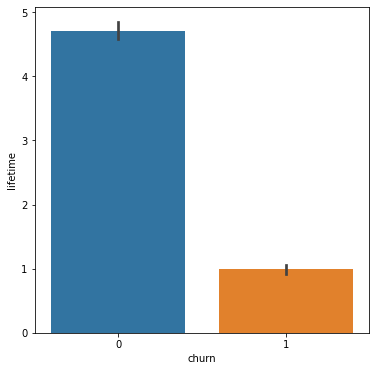

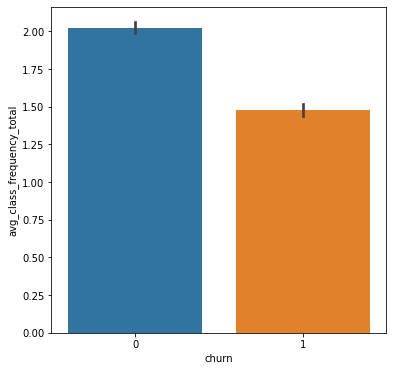

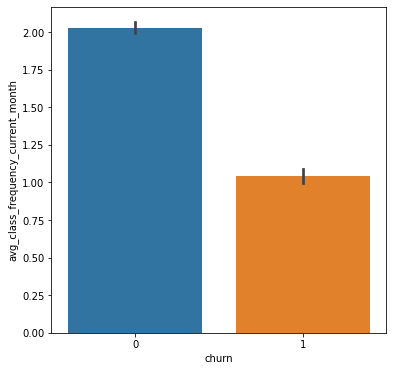

In [60]:
for i in gym_churn.columns[:-1]:
    plt.figure(figsize = (6,6))
    sns.barplot(x='churn', y=i, data=gym_churn)
    plt.show()

Есть три самых выделяющихся различия между клиентами оттока и сохранившимися: *длительность текущего действующего абонемента* (у тех, кто уходит, - меньше 2-х месяцев; у сохранившихся клиентов - почти 6), *срок до окончания текущего действующего абонемента* (меньше 2-х и больше 5-и месяцев, соответственно) и *время с момента первого обращения в фитнес-центр* (около месяца против 4,5) - звучит логично: чем меньше денег "сгорает" на твоем абонементе, тем меньше мотивации идти в зал!

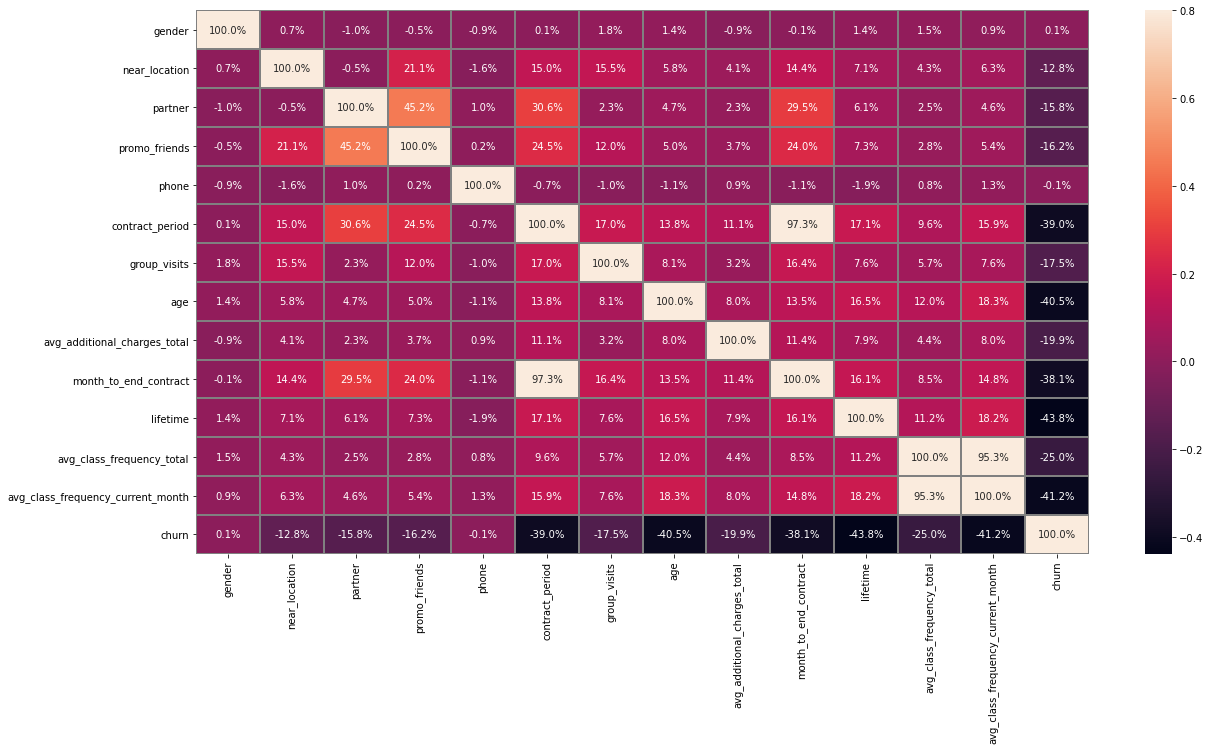

In [61]:
plt.figure(figsize = (20,10))
sns.heatmap(gym_churn.corr(), annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.8)
plt.show()

**Вывод:** существуют три признака, по которым клиенты, попавшие в отток, сильно отличаются от оставшихся:

* *длительность текущего действующего абонемента* (у тех, кто уходит, - меньше 2-х месяцев; у сохранившихся клиентов - почти 6);
* *срок до окончания текущего действующего абонемента* (меньше 2-х и больше 5-и месяцев, соответственно);
* *время с момента первого обращения в фитнес-центр* (около месяца против 4,5)

А также есть две пары признаков, которые сильно коррелируют друг с другом:
* *длительность текущего действующего абонемента и срок до окончания текущего действующего абонемента*;
* *средняя частота посещений в неделю за предыдущий месяц и средняя частота посещений в неделю за все время с начала действия абонемента*

Такие корреляции являются причиной мультиколлинеарности. Поэтому удалим избыточные признаки, когда будем составлять матрицу признаков

## Шаг 3. Построение модели прогнозирования оттока клиентов

Решим задачу предсказания оттока клиента (бинарной классификации) с помощью методов логистической регрессии и случайного леса. Разделим данные на матрицу наблюдений и вектор значений целевых переменной (фатка оттока)

In [62]:
X = gym_churn.drop(['churn', 'month_to_end_contract', 'avg_class_frequency_current_month'], axis=1)
y = gym_churn['churn']

Разделим на обучающую и валидационную выборки в соотношении 4:1

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Стандартизируем данные, то есть приведем значения признаков к стандартному виду

In [64]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Создадим и обучим модель логистической регрессии на данных из обучающей выборки. Сделаем прогноз на валидационной матрице признаков

In [65]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)

lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

То же самое проделаем с моделью случайного леса

In [66]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

Сравним модели по трем метрикам классификации: ***accuracy*** *(доля правильных ответов)*, ***precision*** *(точность)* и ***recall*** *(полнота)*

In [67]:
print('Модель логистической регрессии\nAccuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}'
      .format(accuracy_score(y_test, lr_predictions), precision_score(y_test, lr_predictions), recall_score(y_test, lr_predictions)))
print('\nМодель RandomForest (случайный лес)\nAccuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}'
      .format(accuracy_score(y_test, rf_predictions), precision_score(y_test, rf_predictions), recall_score(y_test, rf_predictions)))

Модель логистической регрессии
Accuracy: 0.899
Precision: 0.788
Recall: 0.808

Модель RandomForest (случайный лес)
Accuracy: 0.890
Precision: 0.784
Recall: 0.768


In [129]:
print('Отток клиентов в текущем месяце: {:.3}'.format(gym_churn['churn'].value_counts()[0]/gym_churn['churn'].count()))

Отток клиентов в текущем месяце: 0.735


Модель логистической регрессии справилась с прогнозом лучше. Посмотрим на веса, которые она предложила для признаков. Узнаем, что влияет на отток сильнее всего

In [111]:
features = pd.DataFrame({'name': X.columns, 'value': lr_model.coef_[0]})
features.sort_values('value', ascending=False)

,name,value
0,gender,0.049457
2,partner,-0.053055
1,near_location,-0.088120
4,phone,-0.120001
3,promo_friends,-0.217953
6,group_visits,-0.359770
8,avg_additional_charges_total,-0.567072
10,avg_class_frequency_total,-0.730469
7,age,-1.093218
5,contract_period,-1.316552


Как мы видим, больше всего на лояльность клиента влияет, как бы это парадоксально не было, то, насколько долго он посещает фитнес-клуб. То есть чем дольше он с вами, тем ниже вероятность того, что в следующем месяце он уйдет. Также в тройке признаков по весу находятся длительность текущего абонемента и возраст: чем выше оба этих признака, тем меньше вероятность, что клиент покинет вас в текущем месяце (видимо, эти признаки накладывают определенную ответственность)

**Вывод**: мы провели эксперимент по сравнению двух моделей машинного обучения для задачи предсказания оттока клиента (бинарной классификации): методом логистической регрессии и случайным лесом. Первый алгоритм проявил себя лучше, это подтвердили все метрики.

В полученной модели мы рассмотрели весомость признаков. Самым весомым оказался признак - время с момента первого обращения в фитнес-центр

## Шаг 4. Кластеризация клиентов

Теперь перед нами задача кластеризации клиентов (разделение пользователей на условные группы). Также, как и в прошлом пункте доверимся алгоритмам машинного обучения для решения данной задачи.

Для начала стардантизуем данные

In [44]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

Построим дендрограмму, чтобы определить число кластеров

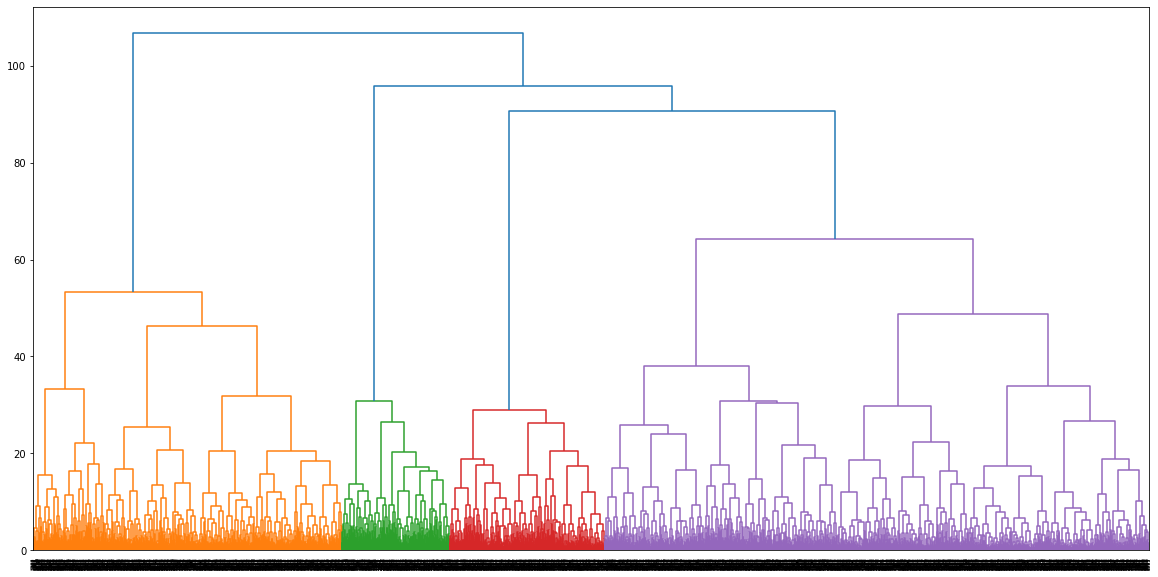

In [122]:
linked = linkage(x_sc, method = 'ward')

plt.figure(figsize=(20, 10))  
dendrogram(linked, orientation='top')
plt.show()

Попробуем разбить клиентов на 5 кластеров

In [123]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(x_sc)

gym_churn['cluster_km'] = labels
cm = sns.light_palette("green", as_cmap=True)
gym_churn.groupby('cluster_km').mean().style.background_gradient(cmap=cm)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.500000,0.000000,0.487455,0.077061,1.000000,2.994624,0.232975,28.700717,137.074181,2.818996,2.991039,1.764059,1.599139,0.401434
1,0.586441,0.997740,0.335593,0.237288,1.000000,2.420339,0.541243,30.616949,169.920776,2.255367,5.323164,2.578051,2.557214,0.054237
2,0.498489,0.993958,0.781470,0.595166,1.000000,10.797583,0.540785,29.930514,161.151317,9.838872,4.715005,2.008542,2.002686,0.028197
3,0.463497,1.000000,0.356537,0.230900,1.000000,1.991511,0.286927,27.670628,123.276755,1.891341,1.966044,1.307259,1.068450,0.558574
4,0.523316,0.862694,0.471503,0.305699,0.000000,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


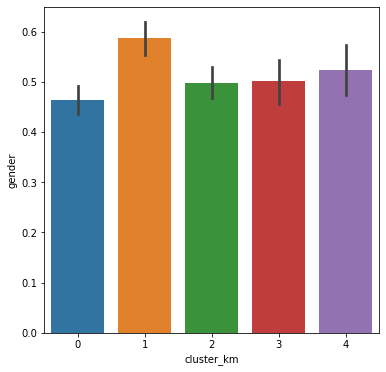

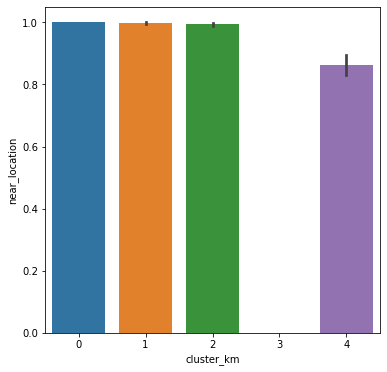

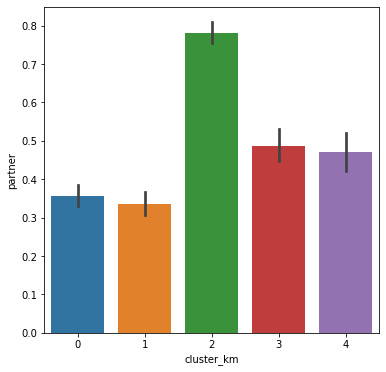

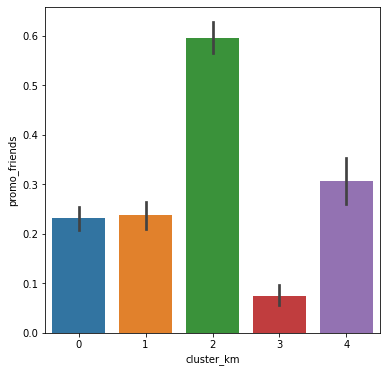

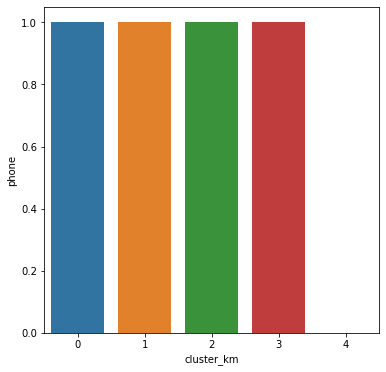

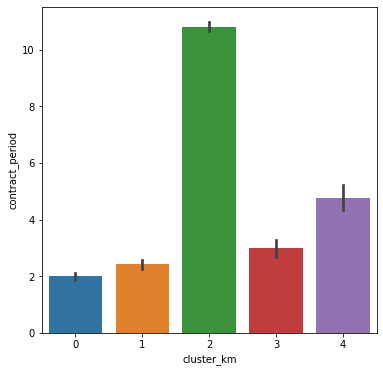

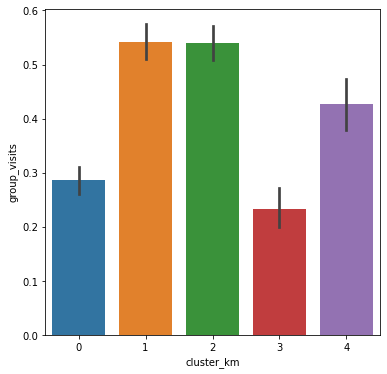

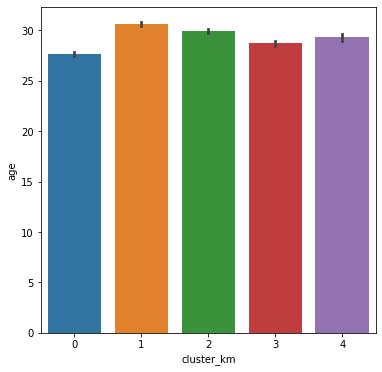

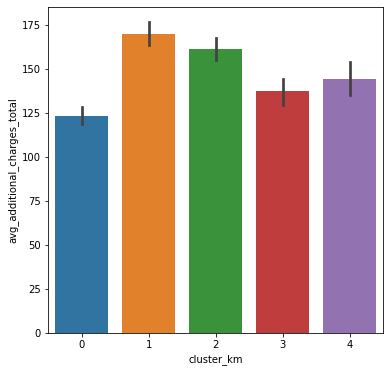

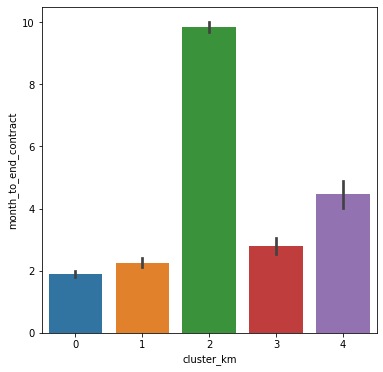

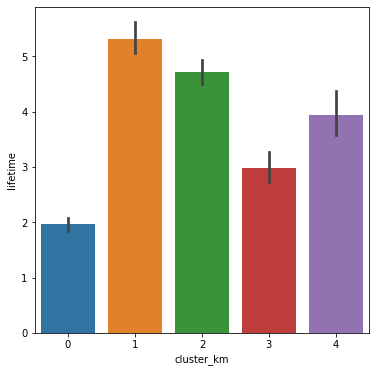

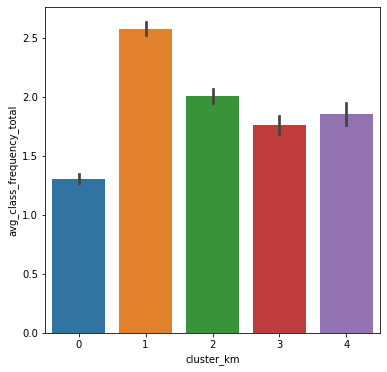

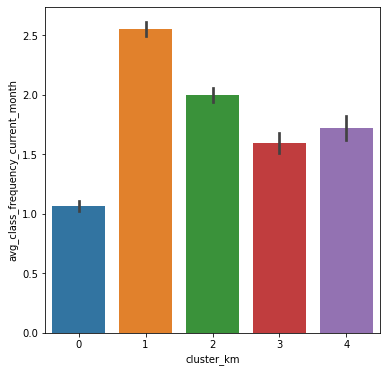

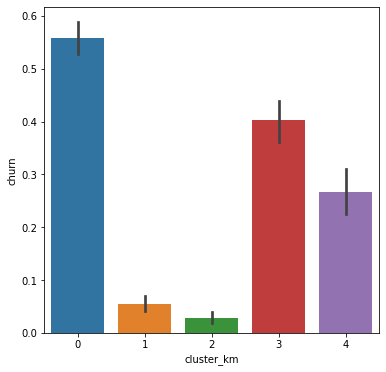

In [121]:
for i in gym_churn.columns[:-1]:
    plt.figure(figsize = (6,6))
    sns.barplot(x='cluster_km', y=i, data=gym_churn)
    plt.show()

Получилось 5 групп пользователей. Помня о том, что *lifetime* клиента сильно влияет на его отток, давайте сразу пронаблюдаем это: действительно, в группах 1 и 2 этот признак наиболее выражен и эти группы закономерно имеют самый низкий отток среди остальных, а нулевой кластер с наименьшим временем, проведенным с фитнес-клубом подтверждает тенденцию, имея самый большой отток

**Вывод**: мы рассмотрели пользователей по кластерам. Веса, найденные в предыдущем пункте подтвердили своё значение и на этом этапе: чем больше времени клиент с фитнес-клубом, тем меньше вероятность того, что он уйдет. Это самый главный признак, за счёт повышения которого, возможно, удастся сократить долю оттока.

## Шаг 5. Выводы

Мы создали модель машинного обучения, которая может прогнозировать отток клиентов со следующими метриками:
* Accuracy(доля правильных ответов): 0.899
* Precision(точность): 0.788
* Recall(полнота): 0.808

В ходе исследования были выявлены следующие признаки, которые сильнее остальных влияют на отток клиентов:
* сколько месяцев клиент посещает фитнес-клуб;
* на сколько месяцев у клиента текущий абонемент;
* возраст.

С каждым из этих признаков можно придумать маркетинговые ходы. Например, создать программу лояльности, которая дает бонусы клиентам, кто остается в фитнес-клубе более полугода; или пересмотреть ассортимент абонементов - убрать краткосрочные (на 1-2 месяца), оставить те, которые расчитаны на больший период; или сделать рекламу для тех, кому за 30, но хочет начать новую жизнь (как показывает исследование, чем старше люди, тем они менее склонны уходить из фитнес-клуба, возможно, из-за большей ответственности)